In [ ]:
#importing the necessary libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sn
from sklearn.decomposition import PCA

In [ ]:
data1 = datasets.load_wine()     #load wine recognition dataset
data = pd.DataFrame(data= np.c_[data1['data'], data1['target']], columns= data1['feature_names'] + ['target'])   #Create dataframe

In [ ]:
data.head()   #Display first 5 rows

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
data1.target_names  #Display classes

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
data.groupby(['target']).count()  #Count each unique value of target column

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0.0,59,59,59,59,59,59,59,59,59,59,59,59,59
1.0,71,71,71,71,71,71,71,71,71,71,71,71,71
2.0,48,48,48,48,48,48,48,48,48,48,48,48,48


In [ ]:
# X = data.iloc[:, 0:4].values
# #Calculate mean and standard deviation
# print(np.mean(X))
# print(np.std(X))

X=data1.data

In [ ]:
# #Feature Scaling and Data standarization
# X_std = StandardScaler().fit_transform(X)
# print(np.mean(X_std))
# print(np.std(X_std))
# X_std.shape

scalar=StandardScaler()
scalar.fit(X)
X_std=scalar.transform(X)

In [ ]:
X.shape

(178, 13)

In [ ]:
X_std.shape

(178, 13)

In [ ]:
#Calculate covariance
cov_x=np.cov(X_std.T)


In [ ]:
cov_x

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [ ]:
#Calculate eigen values and eigen vectors
eigenvalues, eigenvectors = np.linalg.eig(cov_x)
eigenvalues, eigenvectors
len(eigenvalues)

13

In [ ]:
eigenvalues

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
       0.29051203, 0.22706428, 0.25232001])

In [ ]:
#Calculate proportion of variance
for i, value in enumerate(eigenvalues):
    print(f"Proportion of Variance - {i + 1}: {(value / np.sum(eigenvalues)) * 100:.2f}")

Proportion of Variance - 1: 36.20
Proportion of Variance - 2: 19.21
Proportion of Variance - 3: 11.12
Proportion of Variance - 4: 7.07
Proportion of Variance - 5: 6.56
Proportion of Variance - 6: 4.94
Proportion of Variance - 7: 4.24
Proportion of Variance - 8: 0.80
Proportion of Variance - 9: 2.68
Proportion of Variance - 10: 1.30
Proportion of Variance - 11: 2.22
Proportion of Variance - 12: 1.74
Proportion of Variance - 13: 1.93


In [ ]:
#Extract subset of eigen vectors
transform_component = eigenvectors.T[1:3]
transform_component.shape
transform_component

array([[ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [ ]:
transform_component = eigenvectors.T[[0,1]]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(178, 2)

In [ ]:
y_std_cov = np.cov(new_transformed.T)
y_std_cov

array([[ 4.73243698e+00, -1.70659822e-15],
       [-1.70659822e-15,  2.51108093e+00]])

<Figure size 800x600 with 0 Axes>

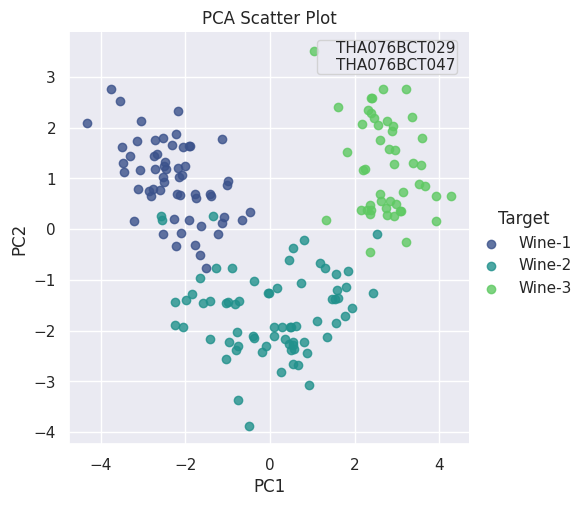

In [ ]:
#For 2 component
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2'])
y = pd.Series(data1.target)
y = y.replace(0, 'Wine-1')
y = y.replace(1, 'Wine-2')
y = y.replace(2, 'Wine-3')
df['Target'] = y

sn.set(style='darkgrid') # Set the style to 'darkgrid' for a similar appearance
plt.figure(figsize=(8,6))

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#Trying differebt combination
transform_component = eigenvectors.T[[6,7]]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(178, 2)

<Figure size 800x600 with 0 Axes>

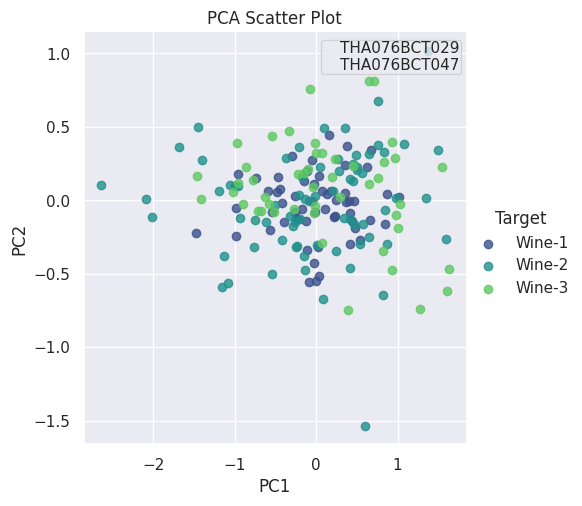

In [ ]:
#For 2 component
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2'])
y = pd.Series(data1.target)
y = y.replace(0, 'Wine-1')
y = y.replace(1, 'Wine-2')
y = y.replace(2, 'Wine-3')
df['Target'] = y

sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance
plt.figure(figsize=(8,6))

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#Trying different combination
transform_component = eigenvectors.T[[0,3]]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(178, 2)

<Figure size 800x600 with 0 Axes>

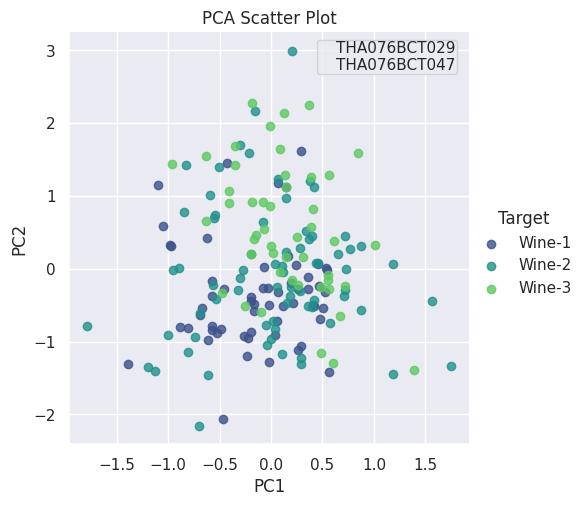

In [ ]:
#For 2 component
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2'])
y = pd.Series(data1.target)
y = y.replace(0, 'Wine-1')
y = y.replace(1, 'Wine-2')
y = y.replace(2, 'Wine-3')
df['Target'] = y

sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance
plt.figure(figsize=(8,6))

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
transform_component1 = eigenvectors.T[0]
transform_component1.shape
transform_component1

array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
       -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
       -0.29671456, -0.37616741, -0.28675223])

In [ ]:
new_transformed1 = X_std @ transform_component1.T
new_transformed1.shape

(178,)

<Figure size 800x600 with 0 Axes>

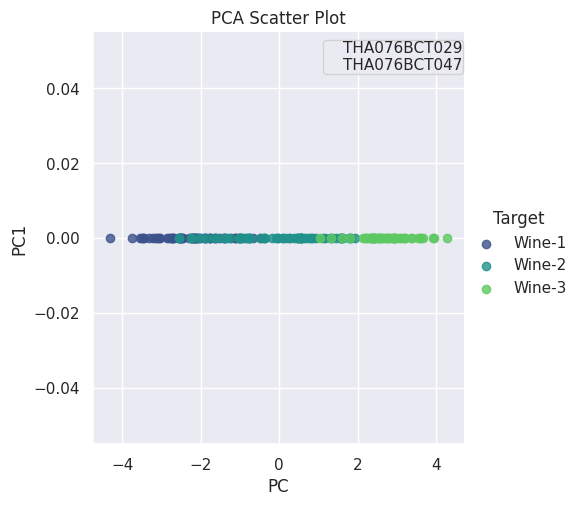

In [ ]:
#For 1 component
df = pd.DataFrame(data = new_transformed1, columns = ['PC'])
df['PC1'] = [0] * new_transformed1.shape[0]
y = pd.Series(data1.target)
y = y.replace(0, 'Wine-1')
y = y.replace(1, 'Wine-2')
y = y.replace(2, 'Wine-3')
df['Target'] = y
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance
plt.figure(figsize=(8,6))

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC', y='PC1', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()


In [ ]:
#Using inbuilt function
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Access the principal components
principal_components = pca.components_
print("Principal Components:\n", principal_components)

Explained Variance Ratio: [0.36198848 0.1920749 ]
Principal Components:
 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


<Figure size 800x600 with 0 Axes>

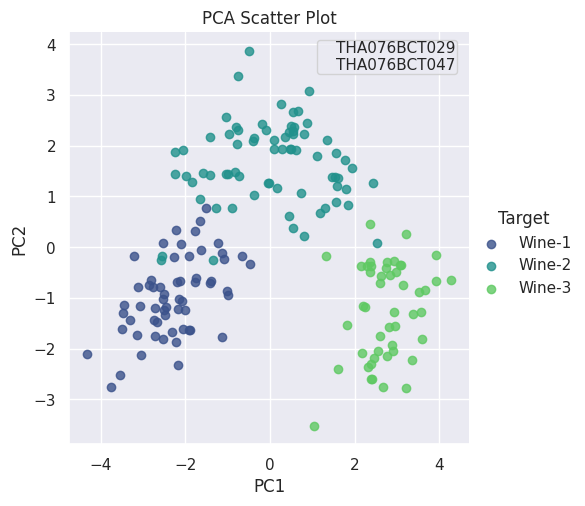

In [ ]:
#For 2 component
df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
df['PC1'] = -df['PC1']
y = pd.Series(data1.target)
y = y.replace(0, 'Wine-1')
y = y.replace(1, 'Wine-2')
y = y.replace(2, 'Wine-3')
df['Target'] = y
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance
plt.figure(figsize=(8,6))

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

#sn.lmplot(x = 'PC1', y = 'PC2', data = df, hue = 'Target', fit_reg = False)

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Access the principal components
principal_components = pca.components_
print("Principal Components:\n", principal_components)

Explained Variance Ratio: [0.36198848]
Principal Components:
 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]]


<Figure size 800x600 with 0 Axes>

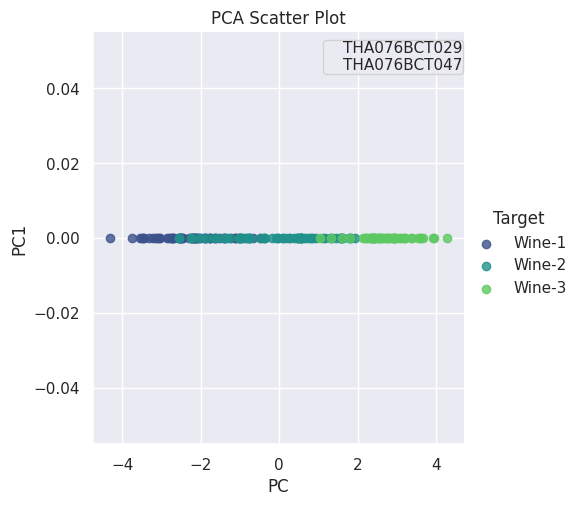

In [ ]:
#For 1 component
df = pd.DataFrame(data = X_pca, columns = ['PC'])
df['PC'] = -df['PC']
df['PC1'] = [0]*df.shape[0]
y = pd.Series(data1.target)
y = y.replace(0, 'Wine-1')
y = y.replace(1, 'Wine-2')
y = y.replace(2, 'Wine-3')
df['Target'] = y
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance
plt.figure(figsize=(8,6))

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]

sn.lmplot(x='PC', y='PC1', data=df, hue= 'Target', fit_reg = False, palette='viridis', legend='full')  # Use scatterplot and add 'style' parameter
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#For 3 component
transform_component = eigenvectors.T[0:3]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(178, 3)

<ipython-input-95-26d58ac75a8e>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Set the colormap to 'viridis'
<ipython-input-95-26d58ac75a8e>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], df.loc[indices, 'PC3'], c=color, marker='o',label = target)


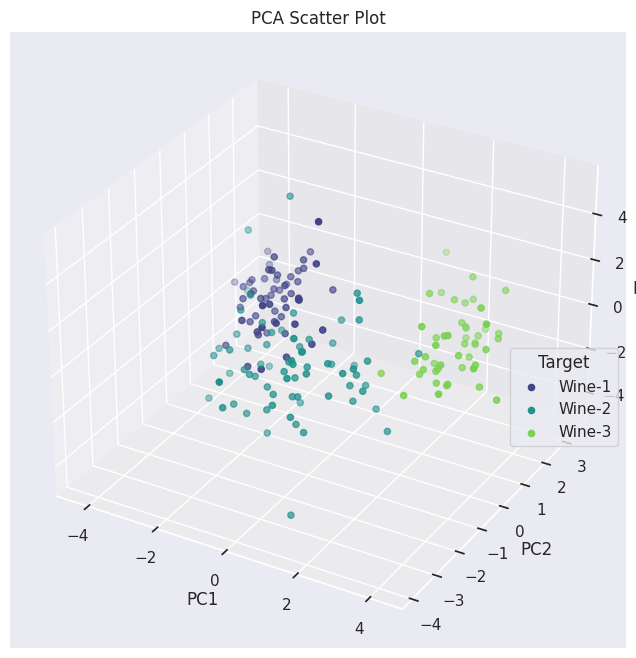

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2','PC3'])
y = pd.Series(data1.target)
y = y.replace(0, 'Wine-1')
y = y.replace(1, 'Wine-2')
y = y.replace(2, 'Wine-3')
df['Target'] = y
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar


legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047', alpha=0)
]

cmap = cm.get_cmap('viridis')  # Set the colormap to 'viridis'
colors = {'Wine-1': cmap(0.2), 'Wine-2': cmap(0.5), 'Wine-3': cmap(0.8)}  # Assign colors from the colormap to categories

for target in df['Target'].unique():
    indices = df['Target'] == target
    color = colors[target]
    ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], df.loc[indices, 'PC3'], c=color, marker='o',label = target)

ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Scatter Plot')
legend = ax.legend()
legend.set_title('Target')
legend.set_bbox_to_anchor((1.0, 0.5))

plt.show()







In [ ]:
#Try different combination
transform_component = eigenvectors.T[[8,9,10]]
transform_component.shape
new_transformed = X_std @ transform_component.T
new_transformed.shape

(178, 3)

<ipython-input-97-00c421fe10da>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Set the colormap to 'viridis'
<ipython-input-97-00c421fe10da>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], df.loc[indices, 'PC3'], c=color, marker='o',label = target)


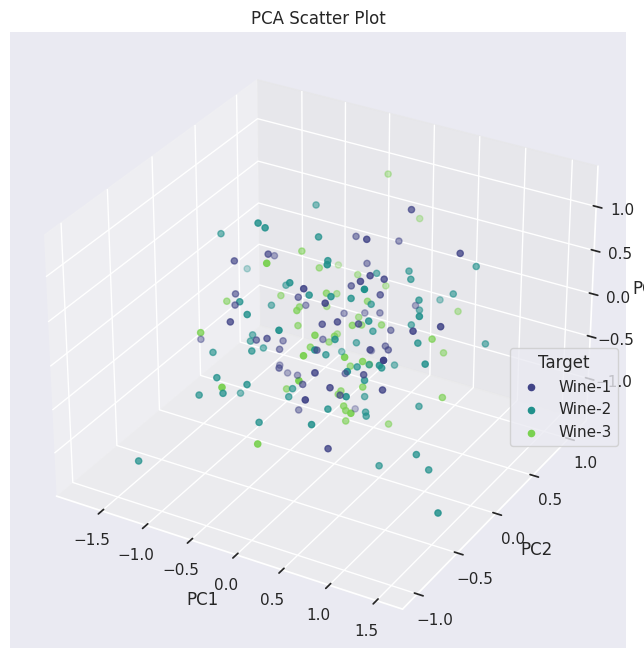

In [ ]:
df = pd.DataFrame(data=new_transformed, columns=['PC1', 'PC2','PC3'])
y = pd.Series(data1.target)
y = y.replace(0, 'Wine-1')
y = y.replace(1, 'Wine-2')
y = y.replace(2, 'Wine-3')
df['Target'] = y
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sn.set(style='darkgrid')  # Set the style to 'darkgrid' for a similar appearance

legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047', alpha=0)
]

cmap = cm.get_cmap('viridis')  # Set the colormap to 'viridis'
colors = {'Wine-1': cmap(0.2), 'Wine-2': cmap(0.5), 'Wine-3': cmap(0.8)}  # Assign colors from the colormap to categories

for target in df['Target'].unique():
    indices = df['Target'] == target
    color = colors[target]
    ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], df.loc[indices, 'PC3'], c=color, marker='o',label = target)

ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.6, 1.0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Scatter Plot')
legend = ax.legend()
legend.set_title('Target')
legend.set_bbox_to_anchor((1.0, 0.5))

plt.show()

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the wine dataset
wine = load_wine()

# Convert the data and target into a DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Display a small sample of examples from all three types of flowers
sample = df.groupby('target').apply(lambda x: x.sample(1)).reset_index(drop=True)
print(sample)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    13.24        2.59  2.87               21.0      118.0           2.80   
1    12.29        2.83  2.22               18.0       88.0           2.45   
2    12.36        3.83  2.38               21.0       88.0           2.30   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        2.69                  0.39             1.82             4.32  1.04   
1        2.25                  0.25             1.99             2.15  1.15   
2        0.92                  0.50             1.04             7.65  0.56   

   od280/od315_of_diluted_wines  proline  target  
0                          2.93    735.0       0  
1                          3.30    290.0       1  
2                          1.58    520.0       2  


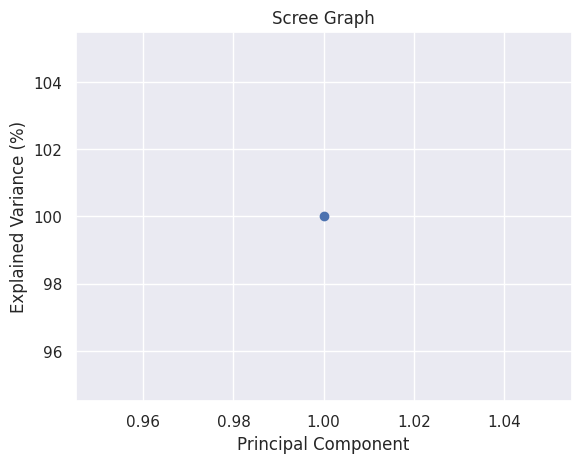

In [ ]:


explained_variance = (pca.explained_variance_ / np.sum(pca.explained_variance_)) * 100

# Plot the scree graph
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Graph')
plt.show()